In [1]:
import pandas as pd
import numpy as np

In [50]:
!pwd

/Users/Sulaiman/Desktop/Data Science 3/KLSAI_1-Data Analytics 101/data_102


In [51]:
imp = pd.read_csv('/Users/Sulaiman/Desktop/Data Science 3/KLSAI_1-Data Analytics 101/data_102/56-malaysias-import-sources.csv', encoding = 'iso-8859-1') 




In [5]:
imp.head()

,Malaysia's Import Sources,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Year,Month,Country,Country Code,Total Import (USD)
2,2016,1,AFGHANISTAN,AF,"10,609"
3,2016,1,ALBANIA,AL,"7,947"
4,2016,1,ALGERIA,DZ,0


In [52]:
imp = pd.read_csv('/Users/Sulaiman/Desktop/Data Science 3/KLSAI_1-Data Analytics 101/data_102/56-malaysias-import-sources.csv', encoding = 'iso-8859-1', header = 2, skipfooter = 2)






/Users/Sulaiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [53]:
imp.head()

,Year,Month,Country,Country Code,Total Import (USD)
0,2016,1,AFGHANISTAN,AF,"10,609"
1,2016,1,ALBANIA,AL,"7,947"
2,2016,1,ALGERIA,DZ,0
3,2016,1,AMERICAN SAMOA,AS,0
4,2016,1,ANDORRA,AD,0


In [54]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 5 columns):
Year                  2571 non-null int64
Month                 2571 non-null int64
Country               2571 non-null object
Country Code          2559 non-null object
Total Import (USD)    2571 non-null object
dtypes: int64(2), object(3)
memory usage: 100.5+ KB


In [55]:
imp.isnull().values.any()

True

In [56]:
imp[imp.isnull().any(axis=1)] #show rows with null values 

,Year,Month,Country,Country Code,Total Import (USD)
125,2016,1,NAMIBIA,NaN,"277,445"
339,2016,2,NAMIBIA,NaN,"260,329"
557,2016,3,NAMIBIA,NaN,"152,975"
772,2016,4,NAMIBIA,NaN,"337,842"
991,2016,5,NAMIBIA,NaN,0
1206,2016,6,NAMIBIA,NaN,"65,484"
1421,2016,7,NAMIBIA,NaN,"177,356"
1632,2016,8,NAMIBIA,NaN,"149,382"
1845,2016,9,NAMIBIA,NaN,"202,926"
2059,2016,10,NAMIBIA,NaN,"24,685"


In [57]:
list(imp)

['Year', 'Month', 'Country', 'Country\xa0Code', 'Total\xa0Import (USD)']

In [58]:
imp['Total\xa0Import (USD)'][0]

'10,609'

In [59]:
type(imp['Total\xa0Import (USD)'][0])

str

## Steps in cleaning the dataset
### 1. change NA into NAM
### 2. We have change \xa0 into " "
### 3. we have to change values in Import into int

In [60]:
# rename columns
imp.columns = ['Year', 'Month', 'Country', 'Country Code', 'Import']
# replace \xa0
imp = imp.replace({'\xa0':" "}, regex=True)
# palcing NAM instead of NA
imp.loc[imp['Country'] == "NAMIBIA", 'Country Code'] = "NAM"
# convert strings into number 
imp["Import"] = imp['Import'].replace({',':''}, regex=True)
imp["Import"] = imp['Import'].apply(int)

In [61]:
imp.head()

,Year,Month,Country,Country Code,Import
0,2016,1,AFGHANISTAN,AF,10609
1,2016,1,ALBANIA,AL,7947
2,2016,1,ALGERIA,DZ,0
3,2016,1,AMERICAN SAMOA,AS,0
4,2016,1,ANDORRA,AD,0


In [63]:
exp = pd.read_csv('/Users/Sulaiman/Desktop/Data Science 3/KLSAI_1-Data Analytics 101/data_102/55-malaysias-export-destination.csv', encoding = 'iso-8859-1',header=2 , skipfooter=2)





/Users/Sulaiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [64]:
exp.head()

,Year,Month,Country,Country Code,Total Export (USD)
0,2016,1,AFGHANISTAN,AF,"6,533,359"
1,2016,1,ALBANIA,AL,"95,077"
2,2016,1,ALGERIA,DZ,"11,758,400"
3,2016,1,AMERICAN SAMOA,AS,"39,681"
4,2016,1,ANDORRA,AD,"72,293"


In [65]:
# rename columns
exp.columns = ['Year', 'Month', 'Country', 'Country Code', 'Export']
# replace \xa0
exp = exp.replace({'\xa0':" "}, regex=True)
# palcing NAM instead of NA
exp.loc[exp['Country'] == "NAMIBIA", 'Country Code'] = "NAM"
# convert strings into number 
exp["Export"] = exp['Export'].replace({',':''}, regex=True)
exp["Export"] = exp['Export'].apply(int)

In [66]:
len(imp)

2571

In [67]:
len(exp)

2571

In [68]:
#export - import = BOT

In [69]:
col_exp = ['Month', 'Country', 'Export']

In [70]:
slim_exp = exp[col_exp]

In [71]:
slim_exp

,Month,Country,Export
0,1,AFGHANISTAN,6533359
1,1,ALBANIA,95077
2,1,ALGERIA,11758400
3,1,AMERICAN SAMOA,39681
4,1,ANDORRA,72293
5,1,ANGOLA,8731875
6,1,ANGUILLA,4578
7,1,ANTIGUA & BARBUDA,399412
8,1,ARGENTINA,12524335
9,1,ARMENIA,195464


In [72]:
col_imp = ['Import']

In [73]:
slim_imp = imp[col_imp]

In [74]:
slim_imp.head()

,Import
0,10609
1,7947
2,0
3,0
4,0


In [75]:
exp_imp = pd.merge(slim_exp,slim_imp, how = 'inner', left_index = True, right_index = True)

In [76]:
exp_imp

,Month,Country,Export,Import
0,1,AFGHANISTAN,6533359,10609
1,1,ALBANIA,95077,7947
2,1,ALGERIA,11758400,0
3,1,AMERICAN SAMOA,39681,0
4,1,ANDORRA,72293,0
5,1,ANGOLA,8731875,290967
6,1,ANGUILLA,4578,0
7,1,ANTIGUA & BARBUDA,399412,0
8,1,ARGENTINA,12524335,43458878
9,1,ARMENIA,195464,0


In [77]:
exp_imp['BOT'] = exp_imp['Export'] - exp_imp['Import']

In [78]:
exp_imp

,Month,Country,Export,Import,BOT
0,1,AFGHANISTAN,6533359,10609,6522750
1,1,ALBANIA,95077,7947,87130
2,1,ALGERIA,11758400,0,11758400
3,1,AMERICAN SAMOA,39681,0,39681
4,1,ANDORRA,72293,0,72293
5,1,ANGOLA,8731875,290967,8440908
6,1,ANGUILLA,4578,0,4578
7,1,ANTIGUA & BARBUDA,399412,0,399412
8,1,ARGENTINA,12524335,43458878,-30934543
9,1,ARMENIA,195464,0,195464


In [79]:
#idxmax
exp_imp['BOT'].idxmax()

2518

In [80]:
exp_imp.loc[exp_imp['BOT'].idxmax()]

Month                         12
Country    REPUBLIC OF SINGAPORE
Export                2452499982
Import                1376037879
BOT                   1076462103
Name: 2518, dtype: object

In [81]:
#idxmin
exp_imp['BOT'].idxmin()

1227

In [82]:
exp_imp.loc[exp_imp['BOT'].idxmin()]

Month                               6
Country    PEOPLE'S REPUBLIC OF CHINA
Export                     1881793225
Import                     3236289669
BOT                       -1354496444
Name: 1227, dtype: object

In [83]:
import matplotlib.pyplot as plt

In [84]:
#filter data to obtain ONLY SINGAPORE

In [85]:
singapore = exp_imp[exp_imp['Country'] == "REPUBLIC OF SINGAPORE"]

In [86]:
singapore

,Month,Country,Export,Import,BOT
156,1,REPUBLIC OF SINGAPORE,2070221203,1507449808,562771395
371,2,REPUBLIC OF SINGAPORE,1897714235,1273649128,624065107
588,3,REPUBLIC OF SINGAPORE,2287069501,1376944507,910124994
804,4,REPUBLIC OF SINGAPORE,2343151544,1388198618,954952926
1022,5,REPUBLIC OF SINGAPORE,2098509151,1372566851,725942300
1237,6,REPUBLIC OF SINGAPORE,2408595392,1665229749,743365643
1451,7,REPUBLIC OF SINGAPORE,2277493759,1456698375,820795384
1663,8,REPUBLIC OF SINGAPORE,2486442274,1466175375,1020266899
1875,9,REPUBLIC OF SINGAPORE,2533374249,1529666433,1003707816
2090,10,REPUBLIC OF SINGAPORE,2323560095,1596099550,727460545


In [87]:
months = singapore["Month"]

In [88]:
months

156      1
371      2
588      3
804      4
1022     5
1237     6
1451     7
1663     8
1875     9
2090    10
2304    11
2518    12
Name: Month, dtype: int64

In [89]:
sing_exp = singapore['Export']
sing_imp = singapore['Import']
sing_BOT = singapore['BOT']

In [90]:
sing_exp

156     2070221203
371     1897714235
588     2287069501
804     2343151544
1022    2098509151
1237    2408595392
1451    2277493759
1663    2486442274
1875    2533374249
2090    2323560095
2304    2413097382
2518    2452499982
Name: Export, dtype: int64

In [91]:
sing_imp

156     1507449808
371     1273649128
588     1376944507
804     1388198618
1022    1372566851
1237    1665229749
1451    1456698375
1663    1466175375
1875    1529666433
2090    1596099550
2304    1445104222
2518    1376037879
Name: Import, dtype: int64

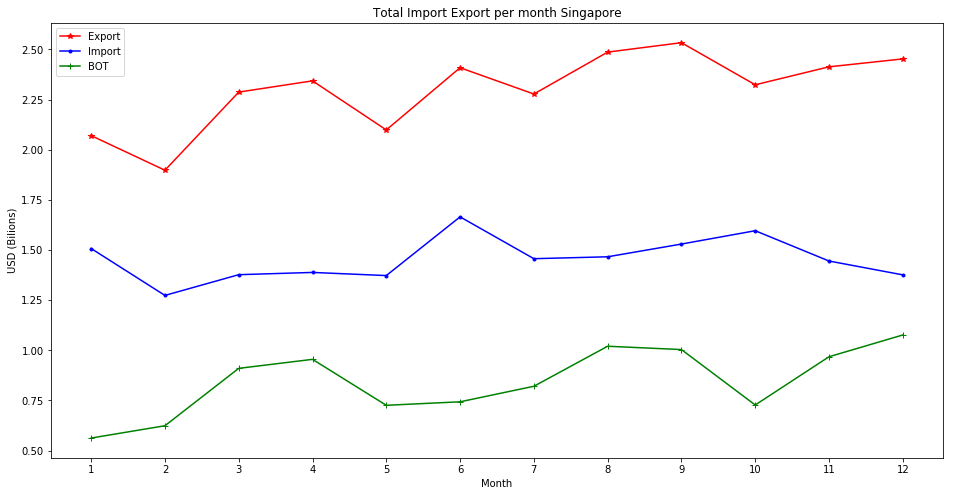

In [92]:
plt.figure(figsize=(16,8))
plt.plot(months, sing_exp/1e9, 'r*-') 
plt.plot(months, sing_imp/1e9, 'b.-') 
plt.plot(months, sing_BOT/1e9, 'g+-')

plt.legend(loc = 0)
#xticks = [months]
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel("USD (Bilions)")
plt.title("Total Import Export per month Singapore")
plt.show()

In [49]:
#1. Plot BOT in the graph above - color green
#2. Move legend so it does not block the graph
#3. change y-axis label to billions